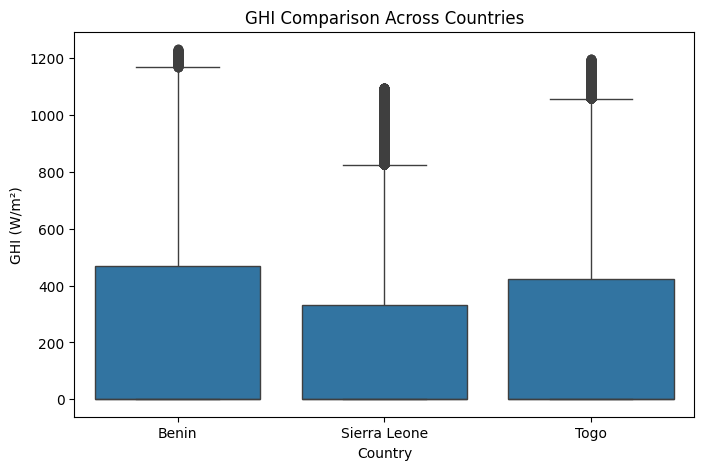

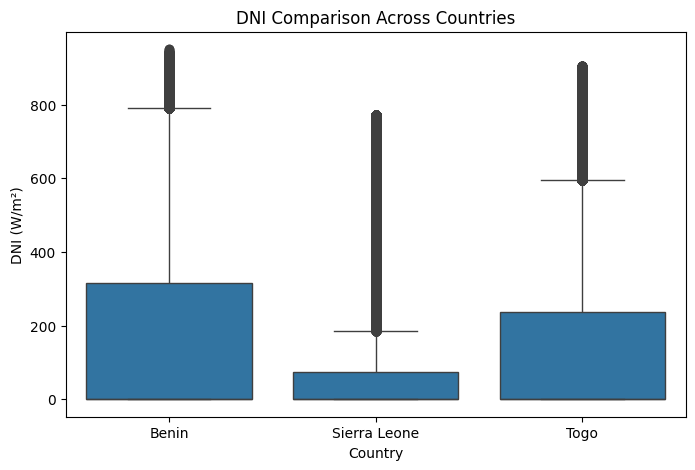

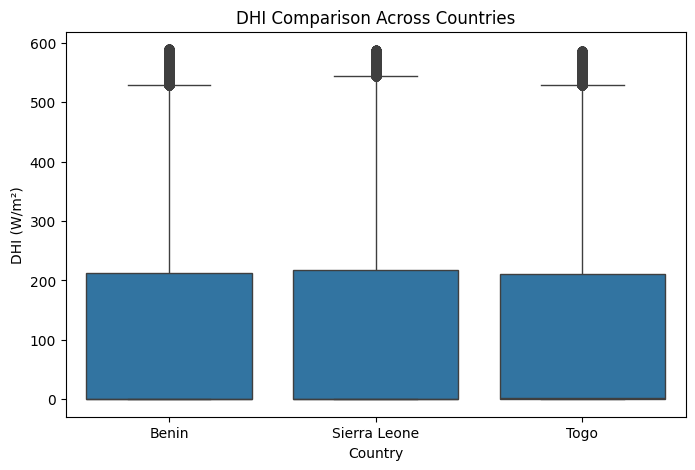

                 GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         237.48    0.6  327.17  167.14    0.0  261.94  113.17    0.4   
Sierra Leone  187.21    0.0  277.02  104.21    0.0  200.82  110.50    0.0   
Togo          225.03    0.5  316.45  147.97    0.0  247.68  112.78    1.5   

                      
                 std  
Country               
Benin         151.66  
Sierra Leone  151.44  
Togo          151.57  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway  # for ANOVA
%matplotlib inline


# Load cleaned CSVs for each country
benin = pd.read_csv("../data/benin_clean.csv")
sierra_leone = pd.read_csv("../data/sierraleone-bumbuna-clean.csv")
togo = pd.read_csv("../data/togo-dapaong_qc-clean.csv")

# Add country identifier
benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine into a single DataFrame
df_all = pd.concat([benin, sierra_leone, togo], ignore_index=True)

# Ensure Timestamp is datetime
df_all['Timestamp'] = pd.to_datetime(df_all['Timestamp'])


metrics = ['GHI', 'DNI', 'DHI']

for metric in metrics:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Country', y=metric, data=df_all)
    plt.title(f'{metric} Comparison Across Countries')
    plt.ylabel(f'{metric} (W/m²)')
    plt.show()


summary = df_all.groupby('Country')[metrics].agg(['mean','median','std']).round(2)
print(summary)
